In [2]:
import pandas as pd

# 데이터 로드
file_path = 'C:\\Users\\Admin\\Documents\\GitHub\\sg_2cha\\jh\\data5\\E-Commerce Churn Data.csv'  # 파일 경로를 지정하세요
data = pd.read_csv(file_path)

# 데이터 구조 확인
print("데이터셋 구조:")
print(data.info())

# 데이터 샘플 확인
print("\n데이터 샘플:")
print(data.head())

# 데이터의 크기 확인
print("\n데이터 크기 (행, 열):", data.shape)


데이터셋 구조:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfA

In [5]:
# 결측치 개수와 비율 확인
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100

print("\n결측치 개수 및 비율:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent}))



결측치 개수 및 비율:
                             Missing Values  Percentage
CustomerID                                0    0.000000
Churn                                     0    0.000000
Tenure                                  264    4.689165
PreferredLoginDevice                      0    0.000000
CityTier                                  0    0.000000
WarehouseToHome                         251    4.458259
PreferredPaymentMode                      0    0.000000
Gender                                    0    0.000000
HourSpendOnApp                          255    4.529307
NumberOfDeviceRegistered                  0    0.000000
PreferedOrderCat                          0    0.000000
SatisfactionScore                         0    0.000000
MaritalStatus                             0    0.000000
NumberOfAddress                           0    0.000000
Complain                                  0    0.000000
OrderAmountHikeFromlastYear             265    4.706927
CouponUsed                        

1단계 요약: 데이터 구조와 결측치 확인 결과
데이터 구조
행(row): 5630개
열(column): 20개
데이터는 범주형 변수(예: PreferredLoginDevice, Gender)와 수치형 변수(예: Tenure, SatisfactionScore)가 혼합되어 있습니다.
일부 열에서 결측치가 발견되었습니다.
결측치 개수 및 비율
Tenure: 4.69%
WarehouseToHome: 4.46%
HourSpendOnApp: 4.53%
OrderAmountHikeFromlastYear: 4.70%
CouponUsed: 4.55%
OrderCount: 4.58%
DaySinceLastOrder: 5.45%

#### **이유**:
- 결측치 비율이 높다면 단순 대체가 데이터의 신뢰성을 크게 저하시킬 수 있습니다.
- 예:
- **5% 미만**: 평균, 중앙값, 최빈값으로 대체 가능.
- **5~30%**: 대체 가능하지만, 대체 방식에 신중해야 함(예: 회귀 기반 대체).
- **30% 이상**: 열 자체를 제거하거나, 분석 목표에 따라 다른 방식을 고려.

---

### **2. 변수의 데이터 분포**
#### **확인 방법**:
- 결측치가 있는 변수의 분포를 시각화합니다.
```python
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Tenure', 'OrderAmountHikeFromlastYear']:
  sns.histplot(data[var].dropna(), kde=True)
  plt.title(f'Distribution of {var}')
  plt.show()



#### **이유**:
- 변수 간 상관관계가 높다면, 회귀 기반 대체나 다른 변수의 값을 참고하여 결측치를 예측할 수 있습니다.
- 예: `OrderAmountHikeFromlastYear`가 `OrderCount`와 상관관계가 높다면, 회귀 모델을 사용해 결측치를 예측.

---

### **4. 결측치 발생 원인 파악**
#### **확인 방법**:
- 결측치가 의도적(예: 특정 고객 그룹에서만 데이터가 수집되지 않은 경우)인지 확인합니다.
- `Churn`이나 `PreferredLoginDevice` 같은 변수와 결측치의 관계를 확인합니다.
```python
for var in ['Tenure', 'HourSpendOnApp']:
  print(data.groupby('Churn')[var].apply(lambda x: x.isnull().mean()))


In [4]:
# 중복 데이터 확인
duplicate_rows = data.duplicated().sum()
print("\n중복 데이터 개수:", duplicate_rows)



중복 데이터 개수: 0


컬럼이름 변경

In [7]:
# 컬럼 이름 변경 매핑
column_mapping = {
    "CustomerID": "고객 ID",
    "Churn": "이탈 여부",
    "Tenure": "가입 기간",
    "PreferredLoginDevice": "로그인 기기",
    "CityTier": "도시 등급",
    "WarehouseToHome": "창고→집 거리",
    "PreferredPaymentMode": "결제 방식",
    "Gender": "성별",
    "HourSpendOnApp": "앱 사용 시간",
    "NumberOfDeviceRegistered": "기기 수",
    "PreferedOrderCat": "주문 카테고리",
    "SatisfactionScore": "만족도",
    "MaritalStatus": "결혼 여부",
    "NumberOfAddress": "주소 수",
    "Complain": "불만 여부",
    "OrderAmountHikeFromlastYear": "주문 증가율",
    "CouponUsed": "쿠폰 수",
    "OrderCount": "주문 횟수",
    "DaySinceLastOrder": "경과일",
    "CashbackAmount": "캐시백 금액"
}

# 데이터프레임 컬럼 이름 변경
data.rename(columns=column_mapping, inplace=True)

# 변경된 컬럼 이름 확인
print("변경된 컬럼 이름:")
print(data.columns)


변경된 컬럼 이름:
Index(['고객 ID', '이탈 여부', '가입 기간', '로그인 기기', '도시 등급', '창고→집 거리', '결제 방식', '성별',
       '앱 사용 시간', '기기 수', '주문 카테고리', '만족도', '결혼 여부', '주소 수', '불만 여부', '주문 증가율',
       '쿠폰 수', '주문 횟수', '경과일', '캐시백 금액'],
      dtype='object')


In [8]:
data


,고객 ID,이탈 여부,가입 기간,로그인 기기,도시 등급,창고→집 거리,결제 방식,성별,앱 사용 시간,기기 수,주문 카테고리,만족도,결혼 여부,주소 수,불만 여부,주문 증가율,쿠폰 수,주문 횟수,경과일,캐시백 금액
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


1단계: 변수별 분포 분석

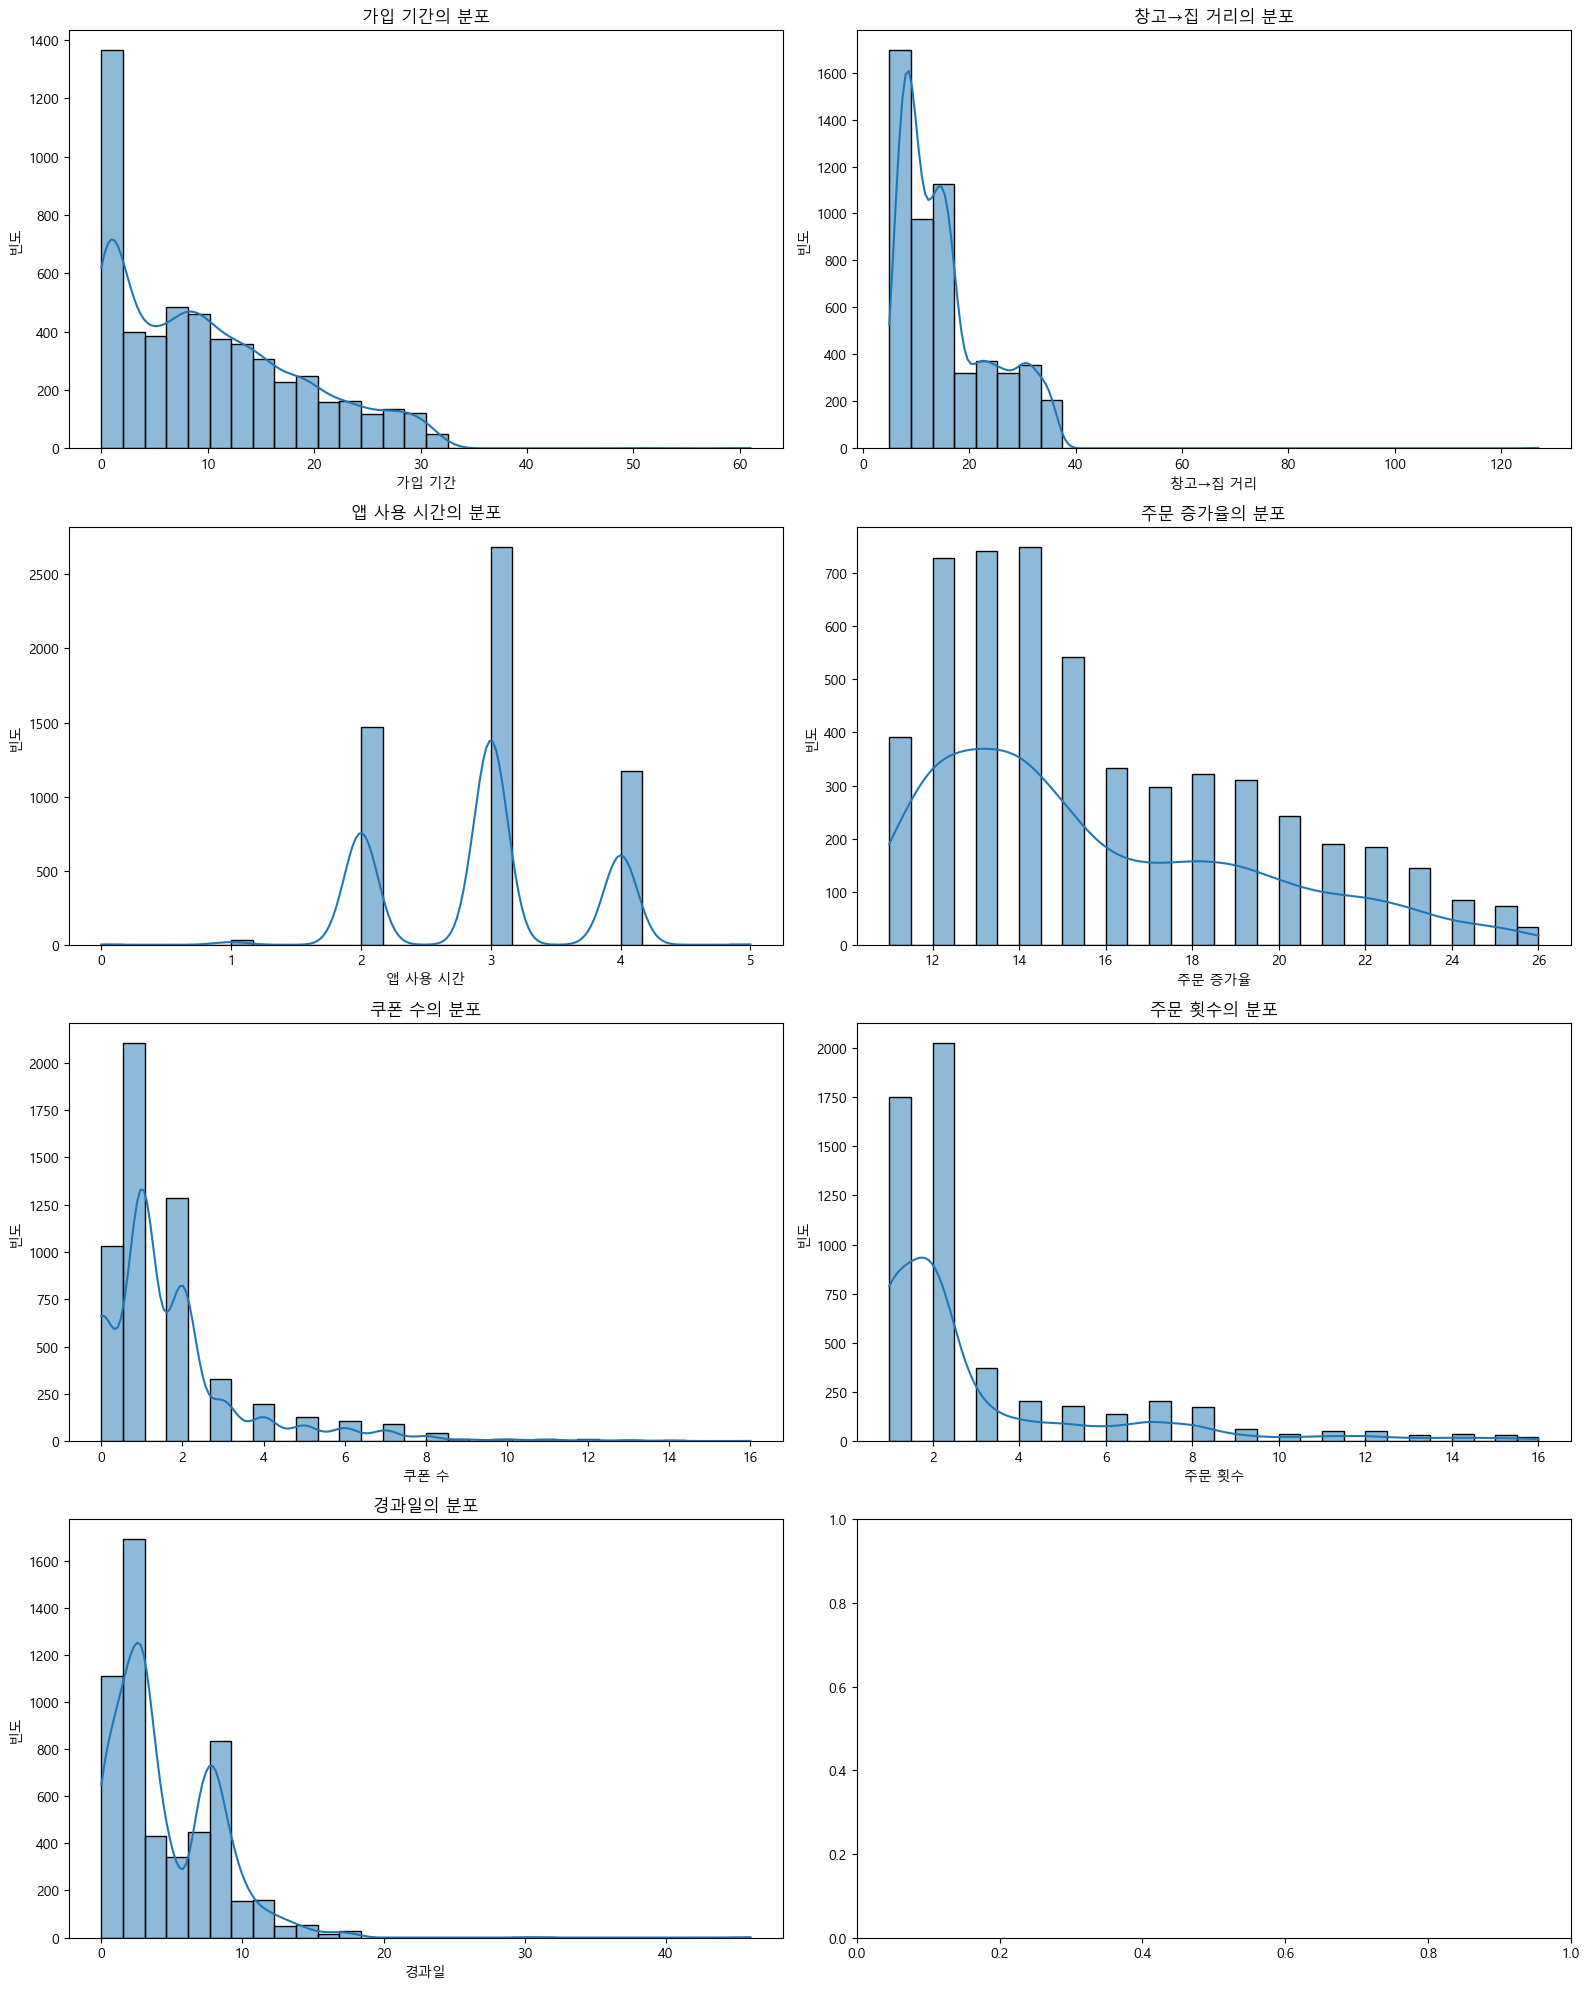

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치가 있는 주요 수치형 변수의 분포 확인
numerical_vars = ['가입 기간', '창고→집 거리', '앱 사용 시간', 
                  '주문 증가율', '쿠폰 수', 
                  '주문 횟수', '경과일']

# 윈도우 기본폰트로 설정하여 폰트오류 해결
plt.rc('font', family='Malgun Gothic')

# 2열로 시각화
fig, axs = plt.subplots(len(numerical_vars) // 2 + (1 if len(numerical_vars) % 2 != 0 else 0), 2, figsize=(16, 20))

for i, var in enumerate(numerical_vars):
    row = i // 2
    col = i % 2
    sns.histplot(data[var].dropna(), kde=True, bins=30, ax=axs[row, col])
    axs[row, col].set_title(f'{var}의 분포')
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('빈도')

plt.tight_layout()
plt.show()


# **시각화 자료 요약**

## **1. 가입 기간의 분포**
- 대부분의 고객은 **가입 기간이 짧음**(0~10개월).
- 가입 기간이 길어질수록 고객 수는 점진적으로 감소.
- 일부 고객은 장기적으로 유지(40개월 이상).

---

## **2. 창고→집 거리의 분포**
- **0~10km 거리**에 가장 많은 고객이 분포.
- 꼬리가 긴 분포를 보여 일부 고객은 100km 이상의 먼 거리에 위치.

---

## **3. 앱 사용 시간의 분포**
- **3시간대에 피크**를 보이는 다중봉형 분포.
- 일부 고객은 앱 사용 시간이 1시간 미만으로 매우 적음.

---

## **4. 주문 증가율의 분포**
- **15%~20% 증가율**을 보이는 고객이 가장 많음.
- 꼬리가 긴 분포로, 일부 고객은 25% 이상의 높은 증가율을 기록.

---

## **5. 쿠폰 수의 분포**
- 대부분의 고객은 **0~2개**의 쿠폰을 사용.
- 일부 고객은 **10개 이상**의 쿠폰을 사용하여 높은 활용도를 보임.

---

## **6. 주문 횟수의 분포**
- 대다수 고객의 주문 횟수는 **1~5회**에 집중.
- 꼬리가 긴 분포로, 일부 고객은 **10회 이상** 주문.

---

## **7. 경과일의 분포**
- 최근 주문 후 **0~10일**이 지난 고객이 대부분.
- 일부 고객은 **20일 이상** 경과.

---

# **요약**
- 대부분의 변수는 **비대칭 분포**를 보이며, 꼬리가 긴 형태가 특징적.
- 고객 특성은 **짧은 활동 주기**(가입 기간, 앱 사용 시간, 경과일)에 집중.
- 극단값이 존재하므로 **중앙값 기반 결측치 처리**나 **로그 변환** 등 적절한 처리가 필요.
